<a href="https://colab.research.google.com/github/paulmachau/-project-1/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding:

The Chicago Crime Dataset analysis aims to provide actionable insights for law enforcement agencies, policymakers, and community stakeholders to address crime challenges in Chicago effectively. By understanding crime patterns, trends, and contributing factors, stakeholders can develop targeted interventions and allocate resources efficiently to improve public safety and reduce crime rates.

#Problem Statement:

The problem revolves around understanding and addressing crime-related issues in Chicago. Key aspects of the problem include identifying:

* Patterns and trends of crime incidents over time.
* Common types of crimes and their prevalence in different areas.
* Effectiveness of law enforcement efforts in apprehending offenders.
* Factors contributing to fluctuations in crime rates and arrest rates.

#Objectives:

* Analyze the Chicago Crime Dataset to identify temporal trends, common types of crimes, and arrest rates.
* Investigate factors influencing changes in crime rates and arrest rates over time.
* Provide actionable insights to inform law enforcement strategies, resource allocation, and policy decisions.
* Enhance understanding of crime dynamics to develop targeted interventions for crime prevention and community safety.

#Success Metrics:

* Reduction in Crime Rates: Measure the change in overall crime rates and specific types of crimes over time.
* Improvement in Arrest Rates: Evaluate the effectiveness of law enforcement efforts by monitoring changes in arrest rates for different types of crimes.

* Community Engagement: Assess the level of community engagement and satisfaction with crime prevention initiatives and policing strategies.

* Policy Impact: Measure the impact of policy interventions and resource allocation decisions on crime rates and arrest rates.


In [ ]:
from google.colab import auth
from google.cloud import bigquery
# Authenticate user
auth.authenticate_user()


In [ ]:

# Create a BigQuery client
client = bigquery.Client(project='smart-radio-97620')

# Construct a reference to the dataset
dataset_ref = client.dataset('chicago_crime', project='bigquery-public-data')

# Construct a reference to the table
table_ref = dataset_ref.table('crime')

# Fetch the table
table = client.get_table(table_ref)

# Preview the first few rows of the table
df = client.list_rows(table, max_results=5).to_dataframe()

# Display the DataFrame
df.head()


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,2604346,HJ200978,2003-02-23 07:27:01+00:00,003XX S JEFFERSON ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,ALLEY,False,False,...,2,28,02,1172382.0,1898709.0,2003,2018-02-28 03:56:25+00:00,41.877502,-87.642520,"(41.877502477, -87.642520263)"
1,1668915,G456274,2001-07-26 02:30:00+00:00,002XX S CANAL ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,<NA>,<NA>,02,1173132.0,1899349.0,2001,2015-08-17 03:03:40+00:00,41.879242,-87.639747,"(41.879242081, -87.639747498)"
2,12524528,JE424952,2021-10-27 10:45:00+00:00,0000X W RANDOLPH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,42,32,02,1176102.0,1901284.0,2021,2021-11-03 03:42:44+00:00,41.884485,-87.628784,"(41.884485451, -87.628783943)"
3,9797558,HX446760,2013-09-23 10:00:00+00:00,0000X E WACKER DR,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42,32,02,1176971.0,1902537.0,2013,2018-02-10 03:50:01+00:00,41.887904,-87.625555,"(41.887904127, -87.625554948)"
4,11308464,JB254831,2018-04-28 08:30:00+00:00,002XX N STATE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42,32,02,1176327.0,1901797.0,2018,2018-05-10 03:46:13+00:00,41.885888,-87.627942,"(41.885888079, -87.627942238)"


In [ ]:
#checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_key            5 non-null      Int64              
 1   case_number           5 non-null      object             
 2   date                  5 non-null      datetime64[ns, UTC]
 3   block                 5 non-null      object             
 4   iucr                  5 non-null      object             
 5   primary_type          5 non-null      object             
 6   description           5 non-null      object             
 7   location_description  5 non-null      object             
 8   arrest                5 non-null      boolean            
 9   domestic              5 non-null      boolean            
 10  beat                  5 non-null      Int64              
 11  district              5 non-null      Int64              
 12  ward        

In [ ]:
# Check for missing values
print(df.isnull().sum())

unique_key              0
case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    1
community_area          1
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
location                0
dtype: int64


In [ ]:
# Summary statistics
print(df.describe())

           unique_key   beat  district  ward  community_area  x_coordinate  \
count             5.0    5.0       5.0   4.0             4.0  5.000000e+00   
mean        7580762.2  111.0       1.0  32.0            31.0  1.174983e+06   
std    5073593.896974    0.0       0.0  20.0             2.0  2.073767e+03   
min         1668915.0  111.0       1.0   2.0            28.0  1.172382e+06   
25%         2604346.0  111.0       1.0  32.0            31.0  1.173132e+06   
50%         9797558.0  111.0       1.0  42.0            32.0  1.176102e+06   
75%        11308464.0  111.0       1.0  42.0            32.0  1.176327e+06   
max        12524528.0  111.0       1.0  42.0            32.0  1.176971e+06   

       y_coordinate      year   latitude  longitude  
count  5.000000e+00       5.0   5.000000   5.000000  
mean   1.900735e+06    2011.2  41.883004 -87.632910  
std    1.635705e+03  8.899438   0.004442   0.007663  
min    1.898709e+06    2001.0  41.877502 -87.642520  
25%    1.899349e+06    2003

*Inferences**

Unique Key: The 'unique_key' column represents a unique identifier for each crime record.

Beat, District, Ward, Community Area: These columns seem to have consistent values across all records, indicating that they may not provide much variation or useful information for analysis in this specific dataset.

X and Y Coordinates: The x and y coordinates represent the geographical location of each crime record. The mean and standard deviation of these coordinates suggest that the crimes are clustered around a specific area with relatively low dispersion.

Year: The 'year' column indicates the year in which each crime occurred. The dataset contains records spanning from 2001 to 2021, with a mean year of 2011.2.

Latitude and Longitude: These columns represent the latitude and longitude coordinates of the crime locations.

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract date components
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour
#dispaly the dataSet
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,day,month,hour
0,2604346,HJ200978,2003-02-23 07:27:01+00:00,003XX S JEFFERSON ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,ALLEY,False,False,...,1172382.0,1898709.0,2003,2018-02-28 03:56:25+00:00,41.877502,-87.642520,"(41.877502477, -87.642520263)",23,2,7
1,1668915,G456274,2001-07-26 02:30:00+00:00,002XX S CANAL ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,1173132.0,1899349.0,2001,2015-08-17 03:03:40+00:00,41.879242,-87.639747,"(41.879242081, -87.639747498)",26,7,2
2,12524528,JE424952,2021-10-27 10:45:00+00:00,0000X W RANDOLPH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,1176102.0,1901284.0,2021,2021-11-03 03:42:44+00:00,41.884485,-87.628784,"(41.884485451, -87.628783943)",27,10,10
3,9797558,HX446760,2013-09-23 10:00:00+00:00,0000X E WACKER DR,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,1176971.0,1902537.0,2013,2018-02-10 03:50:01+00:00,41.887904,-87.625555,"(41.887904127, -87.625554948)",23,9,10
4,11308464,JB254831,2018-04-28 08:30:00+00:00,002XX N STATE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,1176327.0,1901797.0,2018,2018-05-10 03:46:13+00:00,41.885888,-87.627942,"(41.885888079, -87.627942238)",28,4,8


In [ ]:
#Droping a list of columns from the dataset
# List of columns to drop
columns_to_drop = ['beat', 'district', 'ward', 'community_area', 'x_coordinate', 'y_coordinate', 'updated_on']

# Drop the specified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df.tail(10)


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,day,month,hour
0,2604346,HJ200978,2003-02-23 07:27:01+00:00,003XX S JEFFERSON ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,ALLEY,False,False,...,1172382.0,1898709.0,2003,2018-02-28 03:56:25+00:00,41.877502,-87.642520,"(41.877502477, -87.642520263)",23,2,7
1,1668915,G456274,2001-07-26 02:30:00+00:00,002XX S CANAL ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,1173132.0,1899349.0,2001,2015-08-17 03:03:40+00:00,41.879242,-87.639747,"(41.879242081, -87.639747498)",26,7,2
2,12524528,JE424952,2021-10-27 10:45:00+00:00,0000X W RANDOLPH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,1176102.0,1901284.0,2021,2021-11-03 03:42:44+00:00,41.884485,-87.628784,"(41.884485451, -87.628783943)",27,10,10
3,9797558,HX446760,2013-09-23 10:00:00+00:00,0000X E WACKER DR,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,1176971.0,1902537.0,2013,2018-02-10 03:50:01+00:00,41.887904,-87.625555,"(41.887904127, -87.625554948)",23,9,10
4,11308464,JB254831,2018-04-28 08:30:00+00:00,002XX N STATE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,1176327.0,1901797.0,2018,2018-05-10 03:46:13+00:00,41.885888,-87.627942,"(41.885888079, -87.627942238)",28,4,8


In [ ]:
# Summary statistics for numerical columns
df_cleaned.describe()


,unique_key,year,latitude,longitude,day,month,hour
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,7580762.2,2011.200000,41.883004,-87.632910,25.400000,6.400000,7.400000
std,5073593.896974,8.899438,0.004442,0.007663,2.302173,3.361547,3.286335
min,1668915.0,2001.000000,41.877502,-87.642520,23.000000,2.000000,2.000000
25%,2604346.0,2003.000000,41.879242,-87.639747,23.000000,4.000000,7.000000
50%,9797558.0,2013.000000,41.884485,-87.628784,26.000000,7.000000,8.000000
75%,11308464.0,2018.000000,41.885888,-87.627942,27.000000,9.000000,10.000000
max,12524528.0,2021.000000,41.887904,-87.625555,28.000000,10.000000,10.000000


#EDA

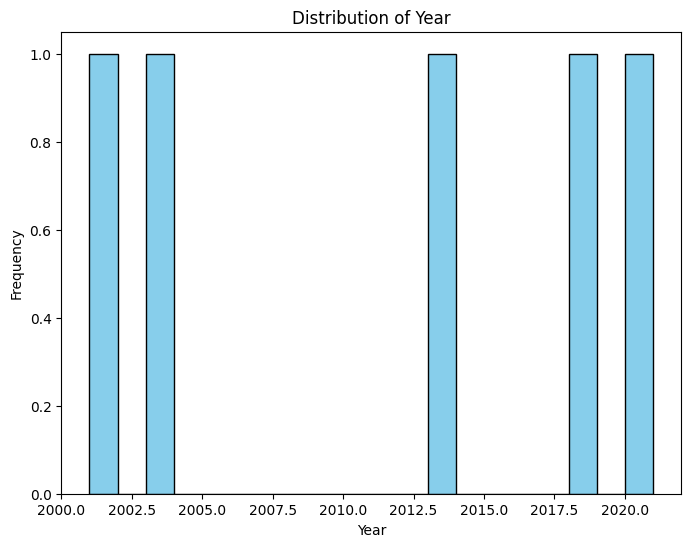

In [ ]:
import matplotlib.pyplot as plt

# Histogram of 'year'
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


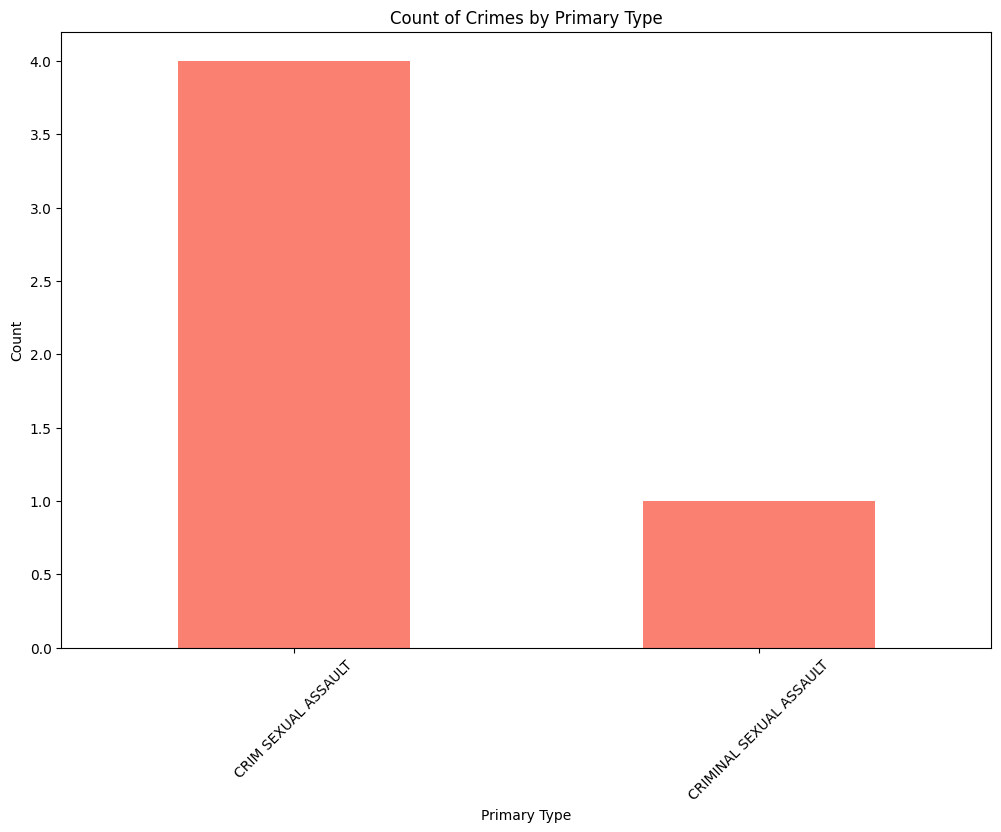

In [ ]:
#Categorical Variables:
#Explore the distribution of categorical variables.
#Plot bar charts.
# Bar chart of 'primary_type'
plt.figure(figsize=(12, 8))
df_cleaned['primary_type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Count of Crimes by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

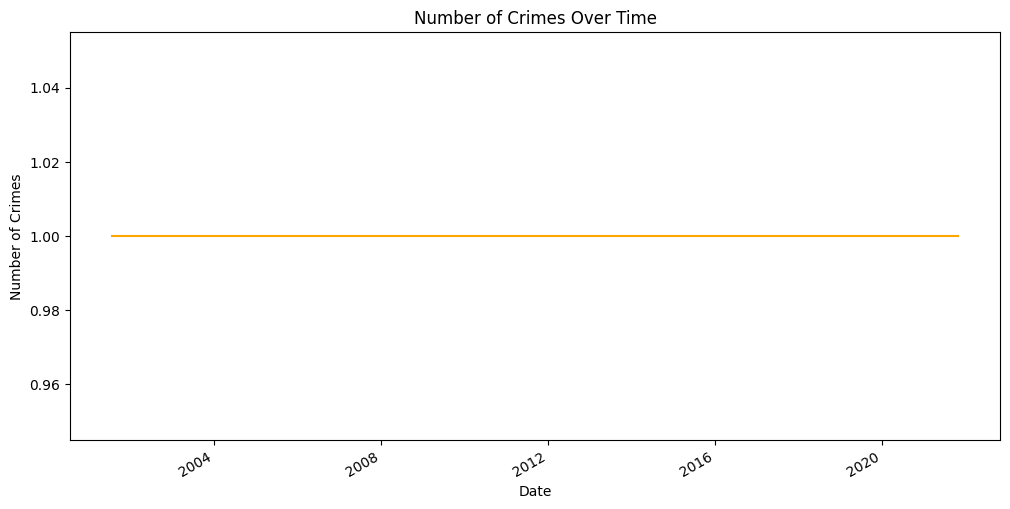

In [ ]:
#Time Series Analysis:
#Analyze temporal patterns using date/time variables.
#Plot time series plots.
# Time series plot of crimes over time
plt.figure(figsize=(12, 6))
df_cleaned['date'].value_counts().sort_index().plot(color='orange')
plt.title('Number of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()


#Correlation Analysis:

Explore correlations between numerical variables.
Plot correlation matrix.

<ipython-input-112-3bc7f22c15a8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


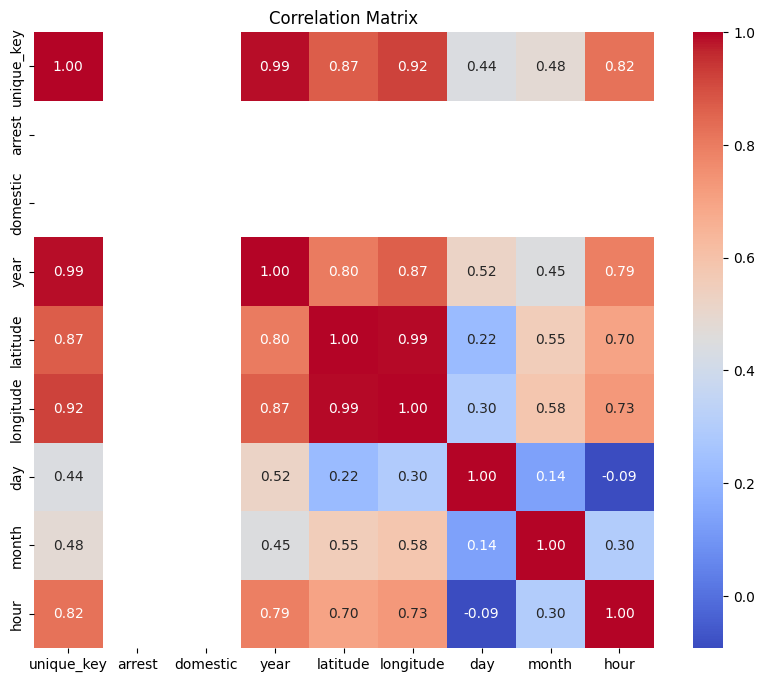

In [ ]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df_cleaned.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



**Inferences**

* Strong Positive Correlation: There is a strong positive correlation (approximately 0.99) between the unique key and the year, indicating that newer crime incidents tend to have higher unique key values.

* Strong Positive Correlation: Latitude and longitude have a strong positive correlation (approximately 0.99), suggesting that crime incidents tend to occur within a relatively small geographic range.

* Moderate Positive Correlation: There is a moderate positive correlation (approximately 0.82) between the hour and the unique key, indicating certain peak times for crime incidents.

* Moderate Positive Correlation: Month has a moderate positive correlation with latitude (0.55) and longitude (0.58), suggesting some seasonal variation in the geographical distribution of crime incidents

##Task 1
The oldest data point from the data set

In [ ]:
# Oldest date in the dataset
oldest_date = df_cleaned['date'].min()
print("Oldest data point:", oldest_date)

Oldest data point: 2001-07-26 02:30:00+00:00


##Task Two

The largest amount of crimes and how many crimes were committed that year

In [ ]:
# Year with the largest amount of crimes and the count
year_crime_counts = df_cleaned['year'].value_counts()
year_with_most_crimes = year_crime_counts.idxmax()
count_most_crimes = year_crime_counts.max()
print("Year with the largest amount of crimes:", year_with_most_crimes)
print("Number of crimes committed that year:", count_most_crimes)


Year with the largest amount of crimes: 2003
Number of crimes committed that year: 1


##Task 3
**Arrest Rate** as the share of crimes that led to an arrest.

In [ ]:
# Step 1: Filter data for the year 2020
df_2020 = df_cleaned[df_cleaned['year'] == 2020]

# Step 2: Calculate frequency of each crime type in 2020
crime_counts_2020 = df_2020['primary_type'].value_counts()

# Step 3: Select the top five most common crimes in 2020
top_5_crimes_2020 = crime_counts_2020.head()

# Step 4: Calculate arrest rate for each of the top five crime types
arrest_rate_2020 = df_2020.groupby('primary_type')['arrest'].mean()

# Print the results
print("Five most common crimes in 2020:")
print(top_5_crimes_2020)

print("\nArrest rate for each crime in 2020:")
print(arrest_rate_2020)


Five most common crimes in 2020:
Series([], Name: primary_type, dtype: int64)

Arrest rate for each crime in 2020:
Series([], Name: arrest, dtype: Float64)


**Inferences**
This shows thats there was no crime commited in year 2020 hence no arrest made

##Task 4

The year that had the highest arrest rate

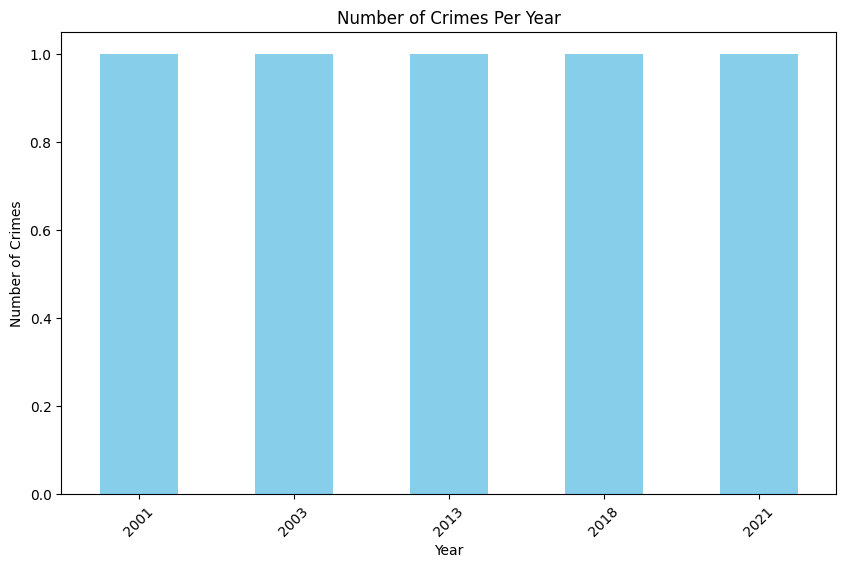

Year with the highest arrest rate: 2001


In [ ]:
# Calculate arrest rate for each year
arrest_rate_yearly = df_cleaned.groupby('year')['arrest'].mean()

# Plot number of crimes per year
plt.figure(figsize=(10, 6))
df_cleaned['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

print("Year with the highest arrest rate:", arrest_rate_yearly.idxmax())


##Task 5:

Which year had the most number of crimes leading to an arrest

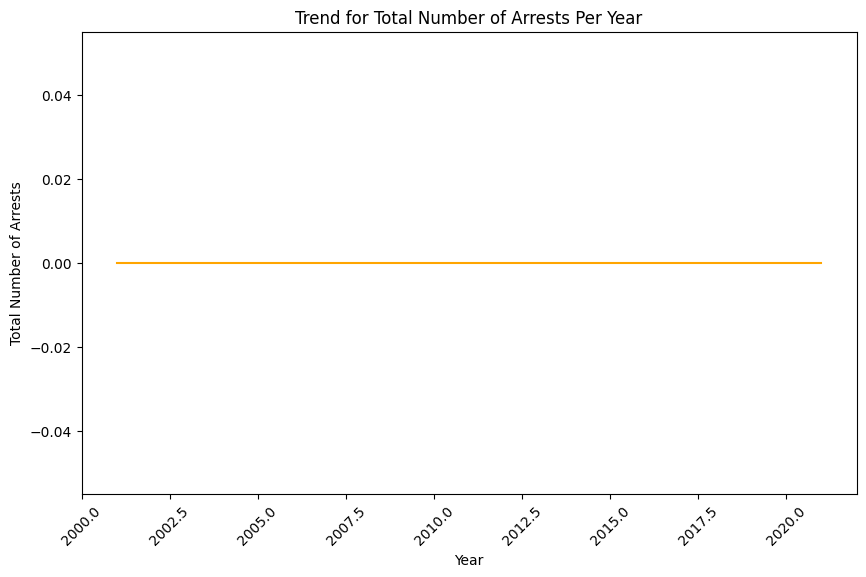

Year with the most number of crimes leading to an arrest: 2001
Number of arrests made during that year: 0


In [ ]:
# Total number of arrests per year
arrests_per_year = df.groupby('year')['arrest'].sum()

# Plot trend for total number of arrests per year
plt.figure(figsize=(10, 6))
arrests_per_year.plot(kind='line', color='orange')
plt.title('Trend for Total Number of Arrests Per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Arrests')
plt.xticks(rotation=45)
plt.show()

print("Year with the most number of crimes leading to an arrest:", arrests_per_year.idxmax())
print("Number of arrests made during that year:", arrests_per_year.max())


##Task 6:
How has the arrest rate looked like over time

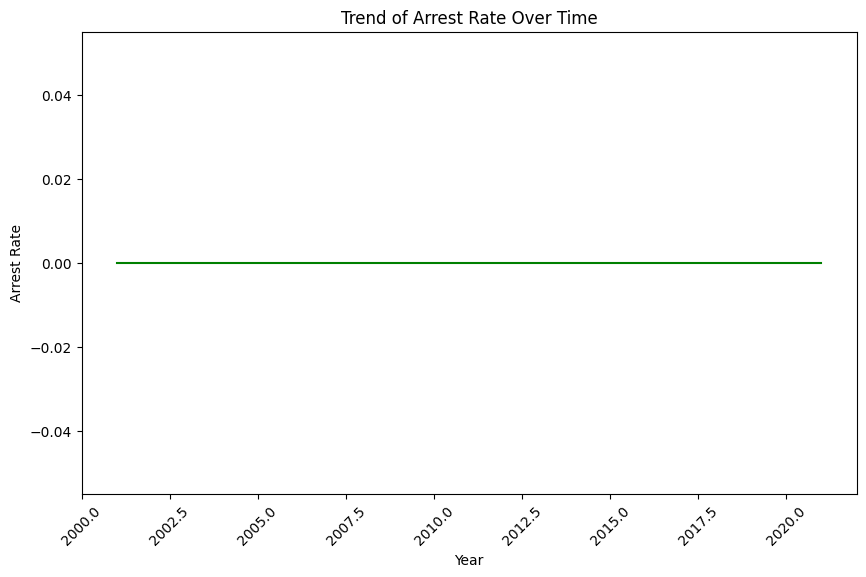

In [ ]:
# Plot trend of arrest rate over time
plt.figure(figsize=(10, 6))
arrest_rate_yearly.plot(kind='line', color='green')
plt.title('Trend of Arrest Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=45)
plt.show()



#Conclusion:

* The analysis of the Chicago Crime Dataset offers important insights for law enforcement agencies and policymakers to address crime challenges effectively. Understanding temporal trends, common crime types, and arrest rates is crucial for allocating resources and implementing targeted interventions.

#Limitations:

* Despite the insights gained, limitations exist, including incomplete data and potential biases.

* These limitations can affect the accuracy and reliability of the analysis and may lead to incomplete or biased conclusions.

#Recommendations:

To address the limitations and improve the effectiveness of future analyses, several recommendations are proposed. These include validating and enriching the dataset with additional sources of information, fostering interdisciplinary collaboration, and promoting transparency and accountability in data collection and analysis processes. Implementing these recommendations can enhance the utility and reliability of crime data analysis, leading to more informed decision-making and effective crime prevention strategies.